In [17]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

In [60]:
# create fuzzy control system
# average temp = 38.3 - 39.2
body_temperature = ctrl.Antecedent(np.arange(34.0,44.0,0.1), "body_temperature")
# heart rate average 70 - 120
heart_rate = ctrl.Antecedent(np.arange(0,190,1), "heart_rate")
# barking lvl, highest bark 113.1 db
barking_volume = ctrl.Antecedent(np.arange(0,113,1), "barking_volume")

is_dog_ok = ctrl.Consequent(np.arange(0,100,1), "is_dog_ok")


In [63]:
#define membership functions for body temperature
body_temperature['low'] = fuzz.trimf(body_temperature.universe, [34,34,38.75])
body_temperature['normal'] = fuzz.gaussmf(body_temperature.universe, mean = 38.75, sigma = 0.6)
body_temperature['high'] = fuzz.trimf(body_temperature.universe, [38.75,44,44])

In [64]:
#define membership functions for heart rate
heart_rate['low'] = fuzz.gaussmf(heart_rate.universe, mean=0, sigma = 30)
heart_rate['normal'] = fuzz.gaussmf(heart_rate.universe, mean = 95, sigma = 40)
heart_rate['high'] = fuzz.gaussmf(heart_rate.universe, mean=190, sigma = 30)

In [65]:
barking_volume['quiet'] = fuzz.gaussmf(barking_volume.universe, mean=0, sigma = 25)
barking_volume['moderate'] = fuzz.gaussmf(barking_volume.universe, mean=56.5, sigma = 20)
barking_volume['loud'] = fuzz.gaussmf(barking_volume.universe, mean=113, sigma = 25)

In [66]:
is_dog_ok["perfect"] = fuzz.gaussmf(is_dog_ok.universe, mean=0, sigma = 10)
is_dog_ok["normal"] = fuzz.gbellmf(x = is_dog_ok.universe, a = 15, b = 4, c = 30)
is_dog_ok["need help"] = fuzz.gaussmf(is_dog_ok.universe, mean=70, sigma = 25)
is_dog_ok["urgent"] = fuzz.gaussmf(is_dog_ok.universe, mean=100, sigma = 10)

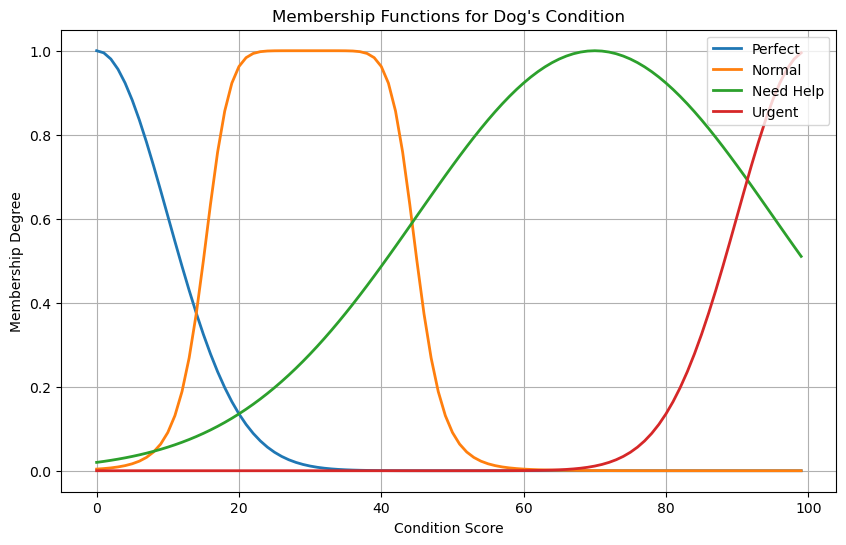

In [53]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

# Define the universe for "is dog ok?" variable
is_dog_ok_universe = np.arange(0, 100, 1)

# Define membership functions for "is dog ok?" categories
perfect_dog = fuzz.gaussmf(is_dog_ok_universe, mean=0, sigma=10)
normal_dog = fuzz.gbellmf(is_dog_ok_universe, a = 15, b = 4, c = 30)
need_help_dog = fuzz.gaussmf(is_dog_ok_universe, mean=70, sigma=25)
urgent_dog = fuzz.gaussmf(is_dog_ok_universe, mean=100, sigma=10)

# Plotting the membership functions
plt.figure(figsize=(10, 6))
plt.plot(is_dog_ok_universe, perfect_dog, label='Perfect', linewidth=2)
plt.plot(is_dog_ok_universe, normal_dog, label='Normal', linewidth=2)
plt.plot(is_dog_ok_universe, need_help_dog, label='Need Help', linewidth=2)
plt.plot(is_dog_ok_universe, urgent_dog, label='Urgent', linewidth=2)

# Add titles and labels
plt.title("Membership Functions for Dog's Condition")
plt.xlabel("Condition Score")
plt.ylabel("Membership Degree")
plt.legend(loc="upper right")
plt.grid(True)
plt.show()


In [67]:
#Define fuzzy rules
rule1 = ctrl.Rule(body_temperature['normal'] & heart_rate['normal'],is_dog_ok['perfect'])
rule2 = ctrl.Rule(body_temperature['high'] & heart_rate['high'],is_dog_ok['need help'])
rule3 = ctrl.Rule(body_temperature['low'] & heart_rate['low'],is_dog_ok['urgent'])


In [68]:
#create a control system and simulation
system = ctrl.ControlSystem([rule1,rule2,rule3])
sim = ctrl.ControlSystemSimulation(system)


In [69]:
# Input values
sim.input['body_temperature'] = 38
sim.input['heart_rate'] = 90

# Compute the result
sim.compute()

# Output the result
print(sim.output['is_dog_ok'])


12.730189991827258
